# Subject Multi-Classifier Model using NLP

## <font color = Green > Problem Statement </font>

In order to design a question set for the teachers in the future we need to identify a particular question from the pool of questions belonging to a particular subject. These questions are gathered and scrapped through the multiple channels and online open sources. Hence, need an classifier model to analyze the text in a question for identifying which subject it belongs to. 

## <font color = Green > Assignment Understanding </font>

1. The column subject is equivalent to the subject names provided under the author table. 'Subject' should be the target variable here with 4 labels/categories: Maths, Biology, Chemistry, Physics. This subject woulb be our "Actual Subject" and not the predicted one. 
2. There are one too many relationships between the subject and the chapters i.e 1 subject can have many chapters. That is what is included in the chapter column. 
3. We need predict the highest probability of the subject label present under a new column "Predicted Subject" basis of the words available in the question in form of the text. 
4. For this project, we need to focus only on two columns — "Subject” and “Question” to train the model. 

## <font color = Green > Objective </font>

Given a new question comes in, we want to assign it to one of the 4 categories i.e the classifier makes the assumption that each new question is assigned to one and only one subject label. 

## <font color = Green > Steps Followed </font>

+ **Data Understanding, Preparation, and Pre-Processing :**
+ **Feature Engineering and Variable Transformation :**
+ **Exploratory Data Analysis :**
+ **Model Selection, Model Building, and  Prediction :**

## Data Understanding, Preparation, and Pre-Processing

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-dark-palette')
from scipy import stats

import datetime as dt

import plotly
import plotly.express as px

/var/folders/d7/wr0_38q17_38rmx4dysxdyfh0000gn/T/ipykernel_6086/4147116200.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [3]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# read the training dataset

sub = pd.read_csv("./subjects+classifier_dataset.csv")
sub.head()

,id,author,chapter,class_name,creation_time_stamp,edit_time_stamp,folder,question_text,subject
0,11228,ncert12maths,Relations and Functions,12,16-08-2021 4.26,16-08-2021 4.26,NCERT Exemplar,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",NaN
1,11229,ncert12maths,Relations and Functions,12,16-08-2021 4.26,16-08-2021 4.26,NCERT Exemplar,"<p>Set&nbsp;<math xmlns=""http://www.w3.org/199...",NaN
2,11230,ncert12maths,Relations and Functions,12,16-08-2021 4.26,16-08-2021 4.26,NCERT Exemplar,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",NaN
3,11231,ncert12maths,Relations and Functions,12,16-08-2021 4.26,16-08-2021 4.26,NCERT Exemplar,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",NaN
4,11232,ncert12maths,Relations and Functions,12,16-08-2021 4.29,16-08-2021 4.29,NCERT Exemplar,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",NaN


In [5]:
sub.shape

(2065, 9)

In [6]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2065 non-null   int64  
 1   author               2065 non-null   object 
 2   chapter              2065 non-null   object 
 3   class_name           2065 non-null   int64  
 4   creation_time_stamp  2063 non-null   object 
 5   edit_time_stamp      2065 non-null   object 
 6   folder               2065 non-null   object 
 7   question_text        2065 non-null   object 
 8   subject              0 non-null      float64
dtypes: float64(1), int64(2), object(6)
memory usage: 145.3+ KB


In [7]:
sub.describe()

,id,class_name,subject
count,2065.000000,2065.000000,0.0
mean,12994.683293,11.484262,NaN
std,1067.054116,0.499873,NaN
min,11228.000000,11.000000,NaN
25%,12186.000000,11.000000,NaN
50%,13253.000000,11.000000,NaN
75%,13866.000000,12.000000,NaN
max,16000.000000,12.000000,NaN


### <font color = Green > Insights: </font>

+ The above dataset contain variables to predict the subject label. Currently the subject column is empty (missing values) which has to filled with the actual subject labels (Maths, Chemistry, Physics, Biology) from 11th and 12th class.
+ There are 2065 rows and 9 columns affecting the dataset. 
+ We only need Actual Subject and Question columns for the model building. 

### Handling Missing Values

<AxesSubplot: >

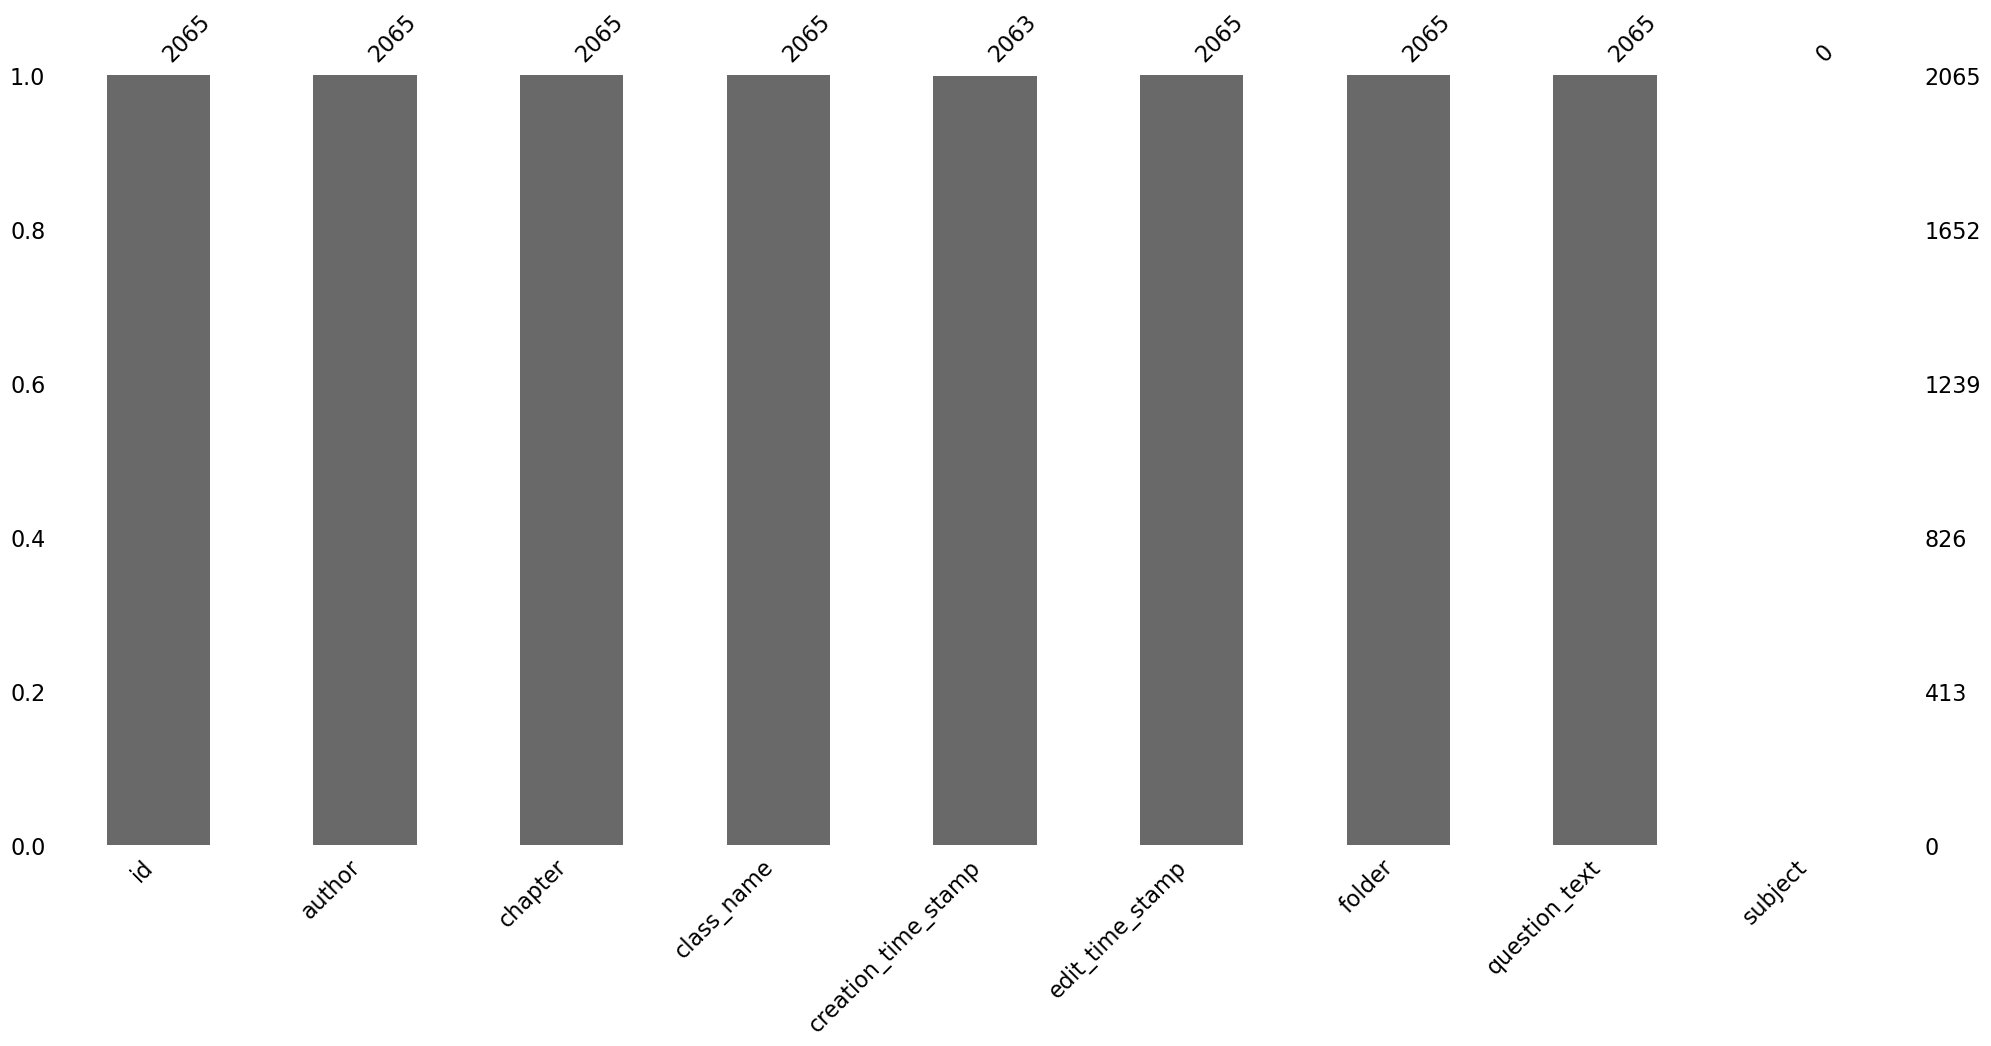

In [8]:
# Checking missing values columns

import missingno as msno
msno.bar(sub)

In [9]:
# Checking missing values percentages

# Checking exact Null Values

def null_values(sub):
    return round((sub.isnull().sum()/len(sub)*100).sort_values(ascending = False),2)

null_values(sub)

subject                100.0
creation_time_stamp      0.1
id                       0.0
author                   0.0
chapter                  0.0
class_name               0.0
edit_time_stamp          0.0
folder                   0.0
question_text            0.0
dtype: float64

### <font color = Green > Insights: </font>

+ There seem to be major missing values in the subject column which we we fill with the labels and very minute missing values in creation_time_stamp. 
+ We will not deal with any other column apart from Questions and Subject. 

In [10]:
# Creating the separate Subject column

import re
pattern = '[0-9]+\w*'
sub["actual_subject"] = sub["author"].apply(lambda i : re.search(pattern,i).group())
sub.head()

,id,author,chapter,class_name,creation_time_stamp,edit_time_stamp,folder,question_text,subject,actual_subject
0,11228,ncert12maths,Relations and Functions,12,16-08-2021 4.26,16-08-2021 4.26,NCERT Exemplar,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",NaN,12maths
1,11229,ncert12maths,Relations and Functions,12,16-08-2021 4.26,16-08-2021 4.26,NCERT Exemplar,"<p>Set&nbsp;<math xmlns=""http://www.w3.org/199...",NaN,12maths
2,11230,ncert12maths,Relations and Functions,12,16-08-2021 4.26,16-08-2021 4.26,NCERT Exemplar,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",NaN,12maths
3,11231,ncert12maths,Relations and Functions,12,16-08-2021 4.26,16-08-2021 4.26,NCERT Exemplar,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",NaN,12maths
4,11232,ncert12maths,Relations and Functions,12,16-08-2021 4.29,16-08-2021 4.29,NCERT Exemplar,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",NaN,12maths


In [11]:
# Final dataframe
subjects = sub[["question_text", "actual_subject"]]
subjects.head()

,question_text,actual_subject
0,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",12maths
1,"<p>Set&nbsp;<math xmlns=""http://www.w3.org/199...",12maths
2,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",12maths
3,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",12maths
4,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",12maths


In [12]:
subjects["actual_subject"].value_counts()

12biology      315
11maths        305
11chemistry    299
12maths        295
11biology      268
11physics      202
12chemistry    194
12physics      185
7350267681       2
Name: actual_subject, dtype: int64

### <font color = Green > Insights: </font>

+ The number is the column belongs to the chemistry subject 12th, let's replace that. 

In [13]:
subjects["actual_subject"] = subjects["actual_subject"].replace("7350267681", "12chemistry")
subjects["actual_subject"].value_counts()

12biology      315
11maths        305
11chemistry    299
12maths        295
11biology      268
11physics      202
12chemistry    196
12physics      185
Name: actual_subject, dtype: int64

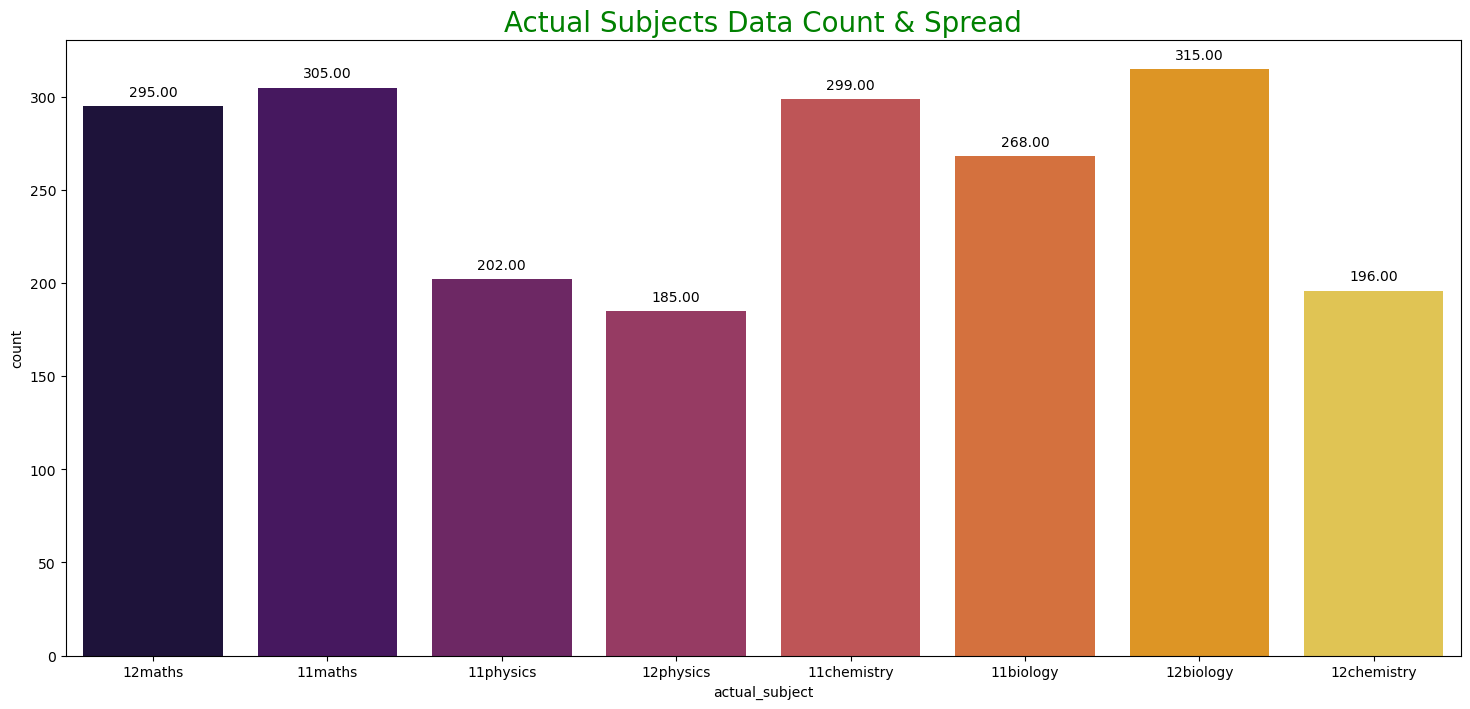

In [14]:
# Checking the imbalance in the Target Variable

plt.figure(figsize=[18,8])
plot = sns.countplot(subjects.actual_subject, palette = 'inferno')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Actual Subjects Data Count & Spread', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
#plt.xticks(rotation=90)
plt.show()

### <font color = Green > Insights: </font>

+ The above data seems to be moderately balanced between the available subject names
+ The data above is "Actual Subject" data

In [15]:
subjects.head(10)

,question_text,actual_subject
0,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",12maths
1,"<p>Set&nbsp;<math xmlns=""http://www.w3.org/199...",12maths
2,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",12maths
3,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",12maths
4,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",12maths
5,"<p>&nbsp;Let&nbsp;<math xmlns=""http://www.w3.o...",12maths
6,"<p>&nbsp;Let&nbsp;<math xmlns=""http://www.w3.o...",12maths
7,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/199...",12maths
8,"<p>Set&nbsp;<math xmlns=""http://www.w3.org/199...",12maths
9,<p>Consider the non-empty set consisting of ch...,12maths


### Bag of words model

+ Subetting the dataset
+ Plotting word frequencies and removing stopwords
+ Tokenisation
+ Stemming
+ Lemmatization

#### Let's take a subset of data (first 50 rows only) and create bag of word model on that. The objective is to undertsand the Text using CountVector.

In [16]:
subject = subjects.iloc[0:50,:]
print(subject)

                                        question_text actual_subject
0   <p>Let&nbsp;<math xmlns="http://www.w3.org/199...        12maths
1   <p>Set&nbsp;<math xmlns="http://www.w3.org/199...        12maths
2   <p>Let&nbsp;<math xmlns="http://www.w3.org/199...        12maths
3   <p>Let&nbsp;<math xmlns="http://www.w3.org/199...        12maths
4   <p>Let&nbsp;<math xmlns="http://www.w3.org/199...        12maths
5   <p>&nbsp;Let&nbsp;<math xmlns="http://www.w3.o...        12maths
6   <p>&nbsp;Let&nbsp;<math xmlns="http://www.w3.o...        12maths
7   <p>Let&nbsp;<math xmlns="http://www.w3.org/199...        12maths
8   <p>Set&nbsp;<math xmlns="http://www.w3.org/199...        12maths
9   <p>Consider the non-empty set consisting of ch...        12maths
10  <p>Let&nbsp;<math xmlns="http://www.w3.org/199...        12maths
11  <p>Let&nbsp;<math xmlns="http://www.w3.org/199...        12maths
12  <p>The identity element for the binary operati...        12maths
13  <p>Let us define a relation&nb

In [17]:
# extract the Questions from the dataframe
questions = subject.question_text
print(questions)

0     <p>Let&nbsp;<math xmlns="http://www.w3.org/199...
1     <p>Set&nbsp;<math xmlns="http://www.w3.org/199...
2     <p>Let&nbsp;<math xmlns="http://www.w3.org/199...
3     <p>Let&nbsp;<math xmlns="http://www.w3.org/199...
4     <p>Let&nbsp;<math xmlns="http://www.w3.org/199...
5     <p>&nbsp;Let&nbsp;<math xmlns="http://www.w3.o...
6     <p>&nbsp;Let&nbsp;<math xmlns="http://www.w3.o...
7     <p>Let&nbsp;<math xmlns="http://www.w3.org/199...
8     <p>Set&nbsp;<math xmlns="http://www.w3.org/199...
9     <p>Consider the non-empty set consisting of ch...
10    <p>Let&nbsp;<math xmlns="http://www.w3.org/199...
11    <p>Let&nbsp;<math xmlns="http://www.w3.org/199...
12    <p>The identity element for the binary operati...
13    <p>Let us define a relation&nbsp;<math xmlns="...
14    <p>Let&nbsp;<math xmlns="http://www.w3.org/199...
15    <p>Let&nbsp;<math xmlns="http://www.w3.org/199...
16    <ol><li>Let&nbsp;<math xmlns="http://www.w3.or...
17    <p>Let&nbsp;<math xmlns="http://www.w3.org

In [18]:
questions.shape

(50,)

In [19]:
# convert questions into list
questions = [question for question in questions]
print(questions)

['<p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow></math>&nbsp;be the set of natural numbers and the function&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo>:</mo>&nbsp;<mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow><mo stretchy="false">→</mo>&nbsp;<mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow></math>&nbsp;be defined by&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo stretchy="false">(</mo>&nbsp;<mi>n</mi>&nbsp;<mo stretchy="false">)</mo>&nbsp;<mo>=</mo>&nbsp;<mn>2</mn>&nbsp;<mi>n</mi>&nbsp;<mo>+</mo>&nbsp;<mn>3</mn>&nbsp;<mi mathvariant="normal">∀</mi>&nbsp;<mi>n</mi>&nbsp;<mo>∈</mo>&nbsp;<mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow></math>. Then&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;</math>&nbsp;is</p>', '<p>Set&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="normal">A</mi>&nbsp;</mrow></math>&nbsp;has 3 e

In [20]:
# load all necessary libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('max_colwidth', 100)

In [21]:
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    # join words to make sentence
    document = " ".join(words)
    
    return document

In [22]:
# preprocess messages using the preprocess function
questions = [preprocess(question) for question in questions]
print(questions)

["< p > let & nbsp ; < math xmlns= '' http : //www.w3.org/1998/math/mathml '' > < mrow > < mi mathvariant= '' bold '' > n < /mi > & nbsp ; < /mrow > < /math > & nbsp ; set natural numbers function & nbsp ; < math xmlns= '' http : //www.w3.org/1998/math/mathml '' > < mi > f < /mi > & nbsp ; < mo > : < /mo > & nbsp ; < mrow > < mi mathvariant= '' bold '' > n < /mi > & nbsp ; < /mrow > < mo stretchy= '' false '' > → < /mo > & nbsp ; < mrow > < mi mathvariant= '' bold '' > n < /mi > & nbsp ; < /mrow > < /math > & nbsp ; defined & nbsp ; < math xmlns= '' http : //www.w3.org/1998/math/mathml '' > < mi > f < /mi > & nbsp ; < mo stretchy= '' false '' > ( < /mo > & nbsp ; < mi > n < /mi > & nbsp ; < mo stretchy= '' false '' > ) < /mo > & nbsp ; < mo > = < /mo > & nbsp ; < mn > 2 < /mn > & nbsp ; < mi > n < /mi > & nbsp ; < mo > + < /mo > & nbsp ; < mn > 3 < /mn > & nbsp ; < mi mathvariant= '' normal '' > ∀ < /mi > & nbsp ; < mi > n < /mi > & nbsp ; < mo > ∈ < /mo > & nbsp ; < mrow > < mi mathva

In [23]:
# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(questions)
print(bow_model.toarray())

[[0 0 4 ... 4 4 4]
 [0 0 4 ... 4 4 4]
 [0 0 3 ... 3 3 3]
 ...
 [0 0 2 ... 2 2 2]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]]


In [24]:
print(bow_model.shape)
print(vectorizer.get_feature_names())

(50, 109)
['10', '17', '1998', '1em', '33', '43', '4pt', '600', '680', '75', 'binary', 'block', 'bold', 'br', 'branch', 'brother', 'children', 'close', 'columnspacing', 'congruent', 'consider', 'consisting', 'corresponds', 'cos', 'cosec', 'cot', 'data', 'define', 'defined', 'denote', 'display', 'divides', 'domain', 'element', 'elements', 'empty', 'equal', 'equals', 'equation', 'euclidean', 'expression', 'false', 'family', 'fence', 'following', 'function', 'functions', 'given', 'gt', 'http', 'identity', 'images', 'injective', 'inner', 'let', 'li', 'lines', 'lt', 'mappings', 'math', 'mathml', 'mathvariant', 'mfrac', 'mi', 'mjx', 'mn', 'mo', 'mrow', 'msqrt', 'msup', 'mtable', 'mtd', 'mtr', 'natural', 'nbsp', 'non', 'none', 'normal', 'nrm', 'number', 'numbers', 'ol', 'one', 'open', 'operation', 'org', 'perpendicular', 'plane', 'pre', 'principal', 'relation', 'respectively', 'rowspacing', 'sec', 'set', 'sin', 'straight', 'stretchy', 'surjections', 'symmetric', 'tan', 'texclass', 'triangles'

## Stemming and lemmatising

#### Stemming

It is a rule-based technique that just chops off the suffix of a word to get its root form, which is called the ‘stem’. For example, if you use a stemmer to stem the words of the string - "The driver is racing in his boss’ car", the words ‘driver’ and ‘racing’ will be converted to their root form by just chopping of the suffixes ‘er’ and ‘ing’. So, ‘driver’ will be converted to ‘driv’ and ‘racing’ will be converted to ‘rac’.

You might think that the root forms (or stems) don’t resemble the root words - ‘drive’ and ‘race’. You don’t have to worry about this because the stemmer will convert all the variants of ‘drive’ and ‘racing’ to those root forms only. So, it will convert ‘drive’, ‘driving’, etc. to ‘driv’, and ‘race’, ‘racer’, etc. to ‘rac’. This gives us satisfactory results in most cases.

#### Lemmarising

This is a more sophisticated technique (and perhaps more 'intelligent') in the sense that it doesn’t just chop off the suffix of a word. Instead, it takes an input word and searches for its base word by going recursively through all the variations of dictionary words. The base word in this case is called the lemma. Words such as ‘feet’, ‘drove’, ‘arose’, ‘bought’, etc. can’t be reduced to their correct base form using a stemmer. But a lemmatizer can reduce them to their correct base form. The most popular lemmatizer is the WordNet lemmatizer created by a team od researchers at the Princeton university. You can read more about it here.

Nevertheless, you may sometimes find yourself confused in whether to use a stemmer or a lemmatizer in your application. The following points might help you make the decision:

+ A stemmer is a rule based technique, and hence, it is much faster than the lemmatizer (which searches the dictionary to look for the lemma of a word). On the other hand, a stemmer typically gives less accurate results than a lemmatizer.
+ A lemmatizer is slower because of the dictionary lookup but gives better results than a stemmer. Now, as a side note, it is important to know that for a lemmatizer to perform accurately, you need to provide the part-of-speech tag of the input word (noun, verb, adjective etc.). You’ll see learn POS tagging in the next session - but it would suffice to know that there are often cases when the POS tagger itself is quite inaccurate on your text, and that will worsen the performance of the lemmatiser as well. In short, you may want to consider a stemmer rather than a lemmatiser if you notice that POS tagging is inaccurate.

In general, you can try both and see if its worth using a lemmatizer over a stemmer. If a stemmer is giving you almost same results with increased efficiency than choose a stemmer, otherwise use a lemmatizer.

In [25]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# add stemming and lemmatisation in the preprocess function
def preprocess(document, stem=True):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    # new step: adding a flag, If stem is true, we call the stemmer function, and if stem is false we call the wordnet function 
    if stem:     
        words = [stemmer.stem(word) for word in words]
    else:
        words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    # join words to make sentence
    document = " ".join(words)
    
    return document

### Bag of words model on stemmed messages

In [26]:
# stemming messages
questions = [preprocess(question, stem=True) for question in subject.question_text]

# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(questions)

In [27]:
# look at the dataframe
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names())

,10,17,1998,1em,33,43,4pt,600,680,75,binari,block,bold,br,branch,brother,children,close,co,columnspacing,congruent,consid,consist,correspond,cosec,cot,data,defin,denot,display,divid,domain,element,empti,equal,equat,euclidean,express,fals,famili,fence,follow,function,given,gt,http,ident,imag,inject,inner,let,li,line,lt,map,math,mathml,mathvariant,mfrac,mi,mjx,mn,mo,mrow,msqrt,msup,mtabl,mtd,mtr,natur,nbsp,non,none,normal,nrm,number,ol,one,open,oper,org,perpendicular,plane,pre,princip,relat,respect,rowspacing,sec,set,sin,straight,stretchy,surject,symmetric,tan,texclass,triangl,true,us,valu,w3,www,xmlns
0,0,0,4,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,4,0,0,0,0,1,0,0,0,0,12,4,5,0,22,0,4,14,8,0,0,0,0,0,1,27,0,0,1,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,4,4,4
1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,1,12,4,4,0,8,0,0,0,8,0,0,0,0,0,0,10,0,0,4,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,4,4,4
2,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,0,9,3,2,0,16,0,6,20,6,0,2,0,0,0,0,26,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,3,3,3
3,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,15,5,3,0,10,0,0,2,6,0,0,0,0,0,1,15,0,0,2,1,1,0,0,0,0,5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,5,5
4,0,0,4,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,4,0,0,0,0,1,0,0,0,0,12,4,5,0,22,0,4,14,8,0,0,0,0,0,1,27,0,0,1,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,4,4,4
5,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,2,0,1,0,0,18,6,4,0,24,0,0,4,6,0,0,0,0,0,0,25,0,0,4,0,0,0,0,0,0,6,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,6,6,6
6,0,1,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,1,0,0,1,0,0,0,0,9,3,2,0,12,0,6,14,6,0,2,0,0,0,0,21,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3,3,3
7,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,0,9,3,2,0,16,0,6,20,6,0,2,0,0,0,0,26,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,3,3,3
8,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,1,12,4,4,0,8,0,0,0,8,0,0,0,0,0,0,10,0,0,4,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,4,4,4
9,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,15,5,3,0,14,0,0,0,6,0,0,0,0,0,0,16,1,0,3,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,5,5


In [28]:
print(vectorizer.get_feature_names())

['10', '17', '1998', '1em', '33', '43', '4pt', '600', '680', '75', 'binari', 'block', 'bold', 'br', 'branch', 'brother', 'children', 'close', 'co', 'columnspacing', 'congruent', 'consid', 'consist', 'correspond', 'cosec', 'cot', 'data', 'defin', 'denot', 'display', 'divid', 'domain', 'element', 'empti', 'equal', 'equat', 'euclidean', 'express', 'fals', 'famili', 'fence', 'follow', 'function', 'given', 'gt', 'http', 'ident', 'imag', 'inject', 'inner', 'let', 'li', 'line', 'lt', 'map', 'math', 'mathml', 'mathvariant', 'mfrac', 'mi', 'mjx', 'mn', 'mo', 'mrow', 'msqrt', 'msup', 'mtabl', 'mtd', 'mtr', 'natur', 'nbsp', 'non', 'none', 'normal', 'nrm', 'number', 'ol', 'one', 'open', 'oper', 'org', 'perpendicular', 'plane', 'pre', 'princip', 'relat', 'respect', 'rowspacing', 'sec', 'set', 'sin', 'straight', 'stretchy', 'surject', 'symmetric', 'tan', 'texclass', 'triangl', 'true', 'us', 'valu', 'w3', 'www', 'xmlns']


In [29]:
len(vectorizer.get_feature_names())

104

### Let's try lemmatizing the messages.

In [30]:
# lemmatise messages
questions = [preprocess(question, stem=False) for question in subject.question_text]

# bag of words model
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(questions)

In [31]:
# look at the dataframe
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names())

,10,17,1998,1em,33,43,4pt,600,680,75,binary,block,bold,br,branch,brother,children,close,columnspacing,congruent,consider,consist,correspond,cos,cosec,cot,data,define,denote,display,divide,domain,element,elements,empty,equal,equation,euclidean,expression,false,family,fence,follow,function,give,gt,http,identity,images,injective,inner,let,li,line,lt,mappings,math,mathml,mathvariant,mfrac,mi,mjx,mn,mo,mrow,msqrt,msup,mtable,mtd,mtr,natural,nbsp,non,none,normal,nrm,number,ol,one,open,operation,org,perpendicular,plane,pre,principal,relation,respectively,rowspacing,sec,set,sin,straight,stretchy,surjections,symmetric,tan,texclass,triangles,true,us,value,w3,www,xmlns
0,0,0,4,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,4,0,0,0,0,1,0,0,0,0,12,4,5,0,22,0,4,14,8,0,0,0,0,0,1,27,0,0,1,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,4,4,4
1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,1,12,4,4,0,8,0,0,0,8,0,0,0,0,0,0,10,0,0,4,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,4,4,4
2,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,0,9,3,2,0,16,0,6,20,6,0,2,0,0,0,0,26,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,3,3,3
3,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,15,5,3,0,10,0,0,2,6,0,0,0,0,0,1,15,0,0,2,1,1,0,0,0,0,5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,5,5
4,0,0,4,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,4,0,0,0,0,1,0,0,0,0,12,4,5,0,22,0,4,14,8,0,0,0,0,0,1,27,0,0,1,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,4,4,4
5,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,2,0,1,0,0,18,6,4,0,24,0,0,4,6,0,0,0,0,0,0,25,0,0,4,0,0,0,0,0,0,6,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,6,6,6
6,0,1,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,1,0,0,1,0,0,0,0,9,3,2,0,12,0,6,14,6,0,2,0,0,0,0,21,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3,3,3
7,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,0,9,3,2,0,16,0,6,20,6,0,2,0,0,0,0,26,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,3,3,3
8,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,1,12,4,4,0,8,0,0,0,8,0,0,0,0,0,0,10,0,0,4,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,4,4,4
9,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,15,5,3,0,14,0,0,0,6,0,0,0,0,0,0,16,1,0,3,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,5,5


In [32]:
print(vectorizer.get_feature_names())

['10', '17', '1998', '1em', '33', '43', '4pt', '600', '680', '75', 'binary', 'block', 'bold', 'br', 'branch', 'brother', 'children', 'close', 'columnspacing', 'congruent', 'consider', 'consist', 'correspond', 'cos', 'cosec', 'cot', 'data', 'define', 'denote', 'display', 'divide', 'domain', 'element', 'elements', 'empty', 'equal', 'equation', 'euclidean', 'expression', 'false', 'family', 'fence', 'follow', 'function', 'give', 'gt', 'http', 'identity', 'images', 'injective', 'inner', 'let', 'li', 'line', 'lt', 'mappings', 'math', 'mathml', 'mathvariant', 'mfrac', 'mi', 'mjx', 'mn', 'mo', 'mrow', 'msqrt', 'msup', 'mtable', 'mtd', 'mtr', 'natural', 'nbsp', 'non', 'none', 'normal', 'nrm', 'number', 'ol', 'one', 'open', 'operation', 'org', 'perpendicular', 'plane', 'pre', 'principal', 'relation', 'respectively', 'rowspacing', 'sec', 'set', 'sin', 'straight', 'stretchy', 'surjections', 'symmetric', 'tan', 'texclass', 'triangles', 'true', 'us', 'value', 'w3', 'www', 'xmlns']


In [33]:
len(vectorizer.get_feature_names())

105

### <font color = Green > Insights: </font>

+ Lemmetization seems to work much profoundly with the words.


## TF-IDF model

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
subjects.head()

,question_text,actual_subject
0,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""bold"">N</mi>...",12maths
1,"<p>Set&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""normal"">A</m...",12maths
2,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mi>f</mi>&nbsp;<mo>:</mo>&nbsp;<mr...",12maths
3,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""normal"">R</m...",12maths
4,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""bold"">N</mi>...",12maths


In [36]:
subjects.shape

(2065, 2)

In [37]:
subject.shape

(50, 2)

In [38]:
# extract the Questions from the dataframe
questions = subject.question_text
print(questions)

0     <p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="bold">N</mi>...
1     <p>Set&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="normal">A</m...
2     <p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo>:</mo>&nbsp;<mr...
3     <p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="normal">R</m...
4     <p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="bold">N</mi>...
5     <p>&nbsp;Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi>&nbsp;</math>&nbsp;...
6     <p>&nbsp;Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo>:</mo>&nb...
7     <p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo>:</mo>&nbsp;<mr...
8     <p>Set&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="normal">A</m...
9     <p>Consider the non-empty set consisting

In [39]:
# convert questions into list
questions = [question for question in questions]
print(questions)

['<p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow></math>&nbsp;be the set of natural numbers and the function&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo>:</mo>&nbsp;<mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow><mo stretchy="false">→</mo>&nbsp;<mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow></math>&nbsp;be defined by&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo stretchy="false">(</mo>&nbsp;<mi>n</mi>&nbsp;<mo stretchy="false">)</mo>&nbsp;<mo>=</mo>&nbsp;<mn>2</mn>&nbsp;<mi>n</mi>&nbsp;<mo>+</mo>&nbsp;<mn>3</mn>&nbsp;<mi mathvariant="normal">∀</mi>&nbsp;<mi>n</mi>&nbsp;<mo>∈</mo>&nbsp;<mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow></math>. Then&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;</math>&nbsp;is</p>', '<p>Set&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="normal">A</mi>&nbsp;</mrow></math>&nbsp;has 3 e

In [40]:
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    # join words to make sentence
    document = " ".join(words)
    
    return document

In [41]:
# preprocess messages using the preprocess function
questions = [preprocess(question) for question in questions]
print(questions)

["< p > let & nbsp ; < math xmlns= '' http : //www.w3.org/1998/math/mathml '' > < mrow > < mi mathvariant= '' bold '' > n < /mi > & nbsp ; < /mrow > < /math > & nbsp ; set natural numbers function & nbsp ; < math xmlns= '' http : //www.w3.org/1998/math/mathml '' > < mi > f < /mi > & nbsp ; < mo > : < /mo > & nbsp ; < mrow > < mi mathvariant= '' bold '' > n < /mi > & nbsp ; < /mrow > < mo stretchy= '' false '' > → < /mo > & nbsp ; < mrow > < mi mathvariant= '' bold '' > n < /mi > & nbsp ; < /mrow > < /math > & nbsp ; defined & nbsp ; < math xmlns= '' http : //www.w3.org/1998/math/mathml '' > < mi > f < /mi > & nbsp ; < mo stretchy= '' false '' > ( < /mo > & nbsp ; < mi > n < /mi > & nbsp ; < mo stretchy= '' false '' > ) < /mo > & nbsp ; < mo > = < /mo > & nbsp ; < mn > 2 < /mn > & nbsp ; < mi > n < /mi > & nbsp ; < mo > + < /mo > & nbsp ; < mn > 3 < /mn > & nbsp ; < mi mathvariant= '' normal '' > ∀ < /mi > & nbsp ; < mi > n < /mi > & nbsp ; < mo > ∈ < /mo > & nbsp ; < mrow > < mi mathva

In [42]:
# bag of words model using TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(questions)

In [43]:
# Let's look at the dataframe
tfidf = pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())
tfidf

,10,17,1998,1em,33,43,4pt,600,680,75,binary,block,bold,br,branch,brother,children,close,columnspacing,congruent,consider,consisting,corresponds,cos,cosec,cot,data,define,defined,denote,display,divides,domain,element,elements,empty,equal,equals,equation,euclidean,expression,false,family,fence,following,function,functions,given,gt,http,identity,images,injective,inner,let,li,lines,lt,mappings,math,mathml,mathvariant,mfrac,mi,mjx,mn,mo,mrow,msqrt,msup,mtable,mtd,mtr,natural,nbsp,non,none,normal,nrm,number,numbers,ol,one,open,operation,org,perpendicular,plane,pre,principal,relation,respectively,rowspacing,sec,set,sin,straight,stretchy,surjections,symmetric,tan,texclass,triangles,true,us,value,w3,www,xmlns
0,0.000000,0.000000,0.088040,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.195782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.043743,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.134798,0.000000,0.000000,0.000000,0.073126,0.000000,0.000000,0.000000,0.088040,0.000000,0.000000,0.000000,0.000000,0.043743,0.000000,0.000000,0.000000,0.000000,0.264121,0.088040,0.197687,0.000000,0.484222,0.000000,0.101038,0.326822,0.176081,0.000000,0.000000,0.000000,0.000000,0.000000,0.078037,0.594273,0.000000,0.000000,0.050464,0.00000,0.000000,0.078037,0.000000,0.000000,0.000000,0.000000,0.088040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060189,0.000000,0.000000,0.131228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.088040,0.088040,0.088040
1,0.000000,0.000000,0.145639,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.072360,0.000000,0.000000,0.00000,0.000000,0.000000,0.279133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145639,0.000000,0.000000,0.139567,0.000000,0.000000,0.000000,0.000000,0.000000,0.139567,0.436918,0.145639,0.261617,0.000000,0.291279,0.000000,0.000000,0.000000,0.291279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.364099,0.000000,0.000000,0.333917,0.00000,0.129092,0.000000,0.000000,0.000000,0.000000,0.000000,0.145639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.145639,0.145639,0.145639
2,0.000000,0.000000,0.069329,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.102782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.045928,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235887,0.000000,0.000000,0.000000,0.000000,0.000000,0.081936,0.000000,0.069329,0.000000,0.000000,0.000000,0.000000,0.045928,0.000000,0.000000,0.000000,0.000000,0.207987,0.069329,0.083025,0.000000,0.369755,0.000000,0.159129,0.490215,0.138658,0.000000,0.061052,0.000000,0.000000,0.000000,0.000000,0.600853,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.229640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.069329,0.069329,0.069329
3,0.000000,0.000000,0.166125,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.073885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.066031,0.000000,0.000000,0.14083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [44]:
# token names
print(vectorizer.get_feature_names())

['10', '17', '1998', '1em', '33', '43', '4pt', '600', '680', '75', 'binary', 'block', 'bold', 'br', 'branch', 'brother', 'children', 'close', 'columnspacing', 'congruent', 'consider', 'consisting', 'corresponds', 'cos', 'cosec', 'cot', 'data', 'define', 'defined', 'denote', 'display', 'divides', 'domain', 'element', 'elements', 'empty', 'equal', 'equals', 'equation', 'euclidean', 'expression', 'false', 'family', 'fence', 'following', 'function', 'functions', 'given', 'gt', 'http', 'identity', 'images', 'injective', 'inner', 'let', 'li', 'lines', 'lt', 'mappings', 'math', 'mathml', 'mathvariant', 'mfrac', 'mi', 'mjx', 'mn', 'mo', 'mrow', 'msqrt', 'msup', 'mtable', 'mtd', 'mtr', 'natural', 'nbsp', 'non', 'none', 'normal', 'nrm', 'number', 'numbers', 'ol', 'one', 'open', 'operation', 'org', 'perpendicular', 'plane', 'pre', 'principal', 'relation', 'respectively', 'rowspacing', 'sec', 'set', 'sin', 'straight', 'stretchy', 'surjections', 'symmetric', 'tan', 'texclass', 'triangles', 'true', 

### <font color = Green > Insights: </font>

+ Finally we can see TF-IDF technique produces my clearner and less noisy words, hence we will build ou model on this technique


# Model Building

In [45]:
subjects.head()

,question_text,actual_subject
0,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""bold"">N</mi>...",12maths
1,"<p>Set&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""normal"">A</m...",12maths
2,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mi>f</mi>&nbsp;<mo>:</mo>&nbsp;<mr...",12maths
3,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""normal"">R</m...",12maths
4,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""bold"">N</mi>...",12maths


In [46]:
subjects.shape

(2065, 2)

In [47]:
subjects.actual_subject.value_counts()

12biology      315
11maths        305
11chemistry    299
12maths        295
11biology      268
11physics      202
12chemistry    196
12physics      185
Name: actual_subject, dtype: int64

In [48]:
# def category_id(actual_subject):
#     if actual_subject == '11maths':
#         out = 0
#     elif actual_subject == '12maths':
#         out = 1
#     elif actual_subject == '11chemistry':
#         out = 2
#     elif actual_subject == '12chemistry':
#         out = 3
#     elif actual_subject == '11biology':
#         out = 4
#     elif actual_subject == '12biology':
#         out = 5
#     elif actual_subject == '11physics':
#         out = 6
#     elif actual_subject == '12physics':
#         out = 7
#     return out

In [49]:
# subjects["category_id"] = subjects["actual_subject"].apply(lambda x: category_id(x))
# subjects.head()

In [50]:
subjects['category_id'] = subjects['actual_subject'].factorize()[0]
from io import StringIO
category_id_df = subjects[['actual_subject', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'actual_subject']].values)
subjects.head()
print(id_to_category)
print(category_id_df)

{0: '12maths', 1: '11maths', 2: '11physics', 3: '12physics', 4: '11chemistry', 5: '11biology', 6: '12biology', 7: '12chemistry'}
     actual_subject  category_id
0           12maths            0
295         11maths            1
484       11physics            2
802       12physics            3
987     11chemistry            4
1286      11biology            5
1545      12biology            6
1869    12chemistry            7


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(subjects.question_text).toarray()
labels = subjects.category_id
features.shape

(2065, 1126)

### <font color = Green > Insights: </font>

+ Now, each of 2065 questions is represented by 1126 features, representing the tf-idf score for different unigrams and bigrams.
+ We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the subjects:

In [52]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for actual_subject, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(actual_subject))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '11biology':
  . Most correlated unigrams:
. belong
. hormone
  . Most correlated bigrams:
. statements incorrect
. living organisms
# '11chemistry':
  . Most correlated unigrams:
. compounds
. iupac
  . Most correlated bigrams:
. correct iupac
. following compounds
# '11maths':
  . Most correlated unigrams:
. nbsp
. mo
  . Most correlated bigrams:
. mo nbsp
. nbsp mo
# '11physics':
  . Most correlated unigrams:
. speed
. motion
  . Most correlated bigrams:
. speed nbsp
. mass nbsp
# '12biology':
  . Most correlated unigrams:
. genes
. dna
  . Most correlated bigrams:
. mo nbsp
. mi nbsp
# '12chemistry':
  . Most correlated unigrams:
. adsorption
. solid
  . Most correlated bigrams:
. nbsp following
. order reaction
# '12maths':
  . Most correlated unigrams:
. texclass
. mo
  . Most correlated bigrams:
. mo nbsp
. msup mi
# '12physics':
  . Most correlated unigrams:
. current
. fleld
  . Most correlated bigrams:
. magnetic fleld
. electric fleld


### <font color = Green > Insights: </font>

+ After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.


### Naive Bayes Classifier

the one most suitable for word counts is the multinomial variant:


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(subjects['question_text'], subjects['actual_subject'], 
                                                    random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

0       <p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="bold">N</mi>...
1       <p>Set&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="normal">A</m...
2       <p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo>:</mo>&nbsp;<mr...
3       <p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="normal">R</m...
4       <p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="bold">N</mi>...
5       <p>&nbsp;Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi>&nbsp;</math>&nbsp;...
6       <p>&nbsp;Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo>:</mo>&nb...
7       <p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo>:</mo>&nbsp;<mr...
8       <p>Set&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="normal">A</m...
9       <p>Consider the non-

### After fitting the training set, let’s make some predictions.

In [54]:
# Predciting the First Question of the data set 
print(clf.predict(count_vect.transform(["<p>Let&nbsp;<math xmlns='http://www.w3.org/1998/Math/MathML'><mrow><mi mathvariant='bold'>N</mi>&nbsp;</mrow></math>&nbsp;be the set of natural numbers and the function&nbsp;<math xmlns='http://www.w3.org/1998/Math/MathML'><mi>f</mi>&nbsp;<mo>:</mo>&nbsp;<mrow><mi mathvariant='bold'>N</mi>&nbsp;</mrow><mo stretchy='false'>→</mo>&nbsp;<mrow><mi mathvariant='bold'>N</mi>&nbsp;</mrow></math>&nbsp;be defined by&nbsp;<math xmlns='http://www.w3.org/1998/Math/MathML'><mi>f</mi>&nbsp;<mo stretchy='false'>(</mo>&nbsp;<mi>n</mi>&nbsp;<mo stretchy='false'>)</mo>&nbsp;<mo>=</mo>&nbsp;<mn>2</mn>&nbsp;<mi>n</mi>&nbsp;<mo>+</mo>&nbsp;<mn>3</mn>&nbsp;<mi mathvariant='normal'>∀</mi>&nbsp;<mi>n</mi>&nbsp;<mo>∈</mo>&nbsp;<mrow><mi mathvariant='bold'>N</mi>&nbsp;</mrow></math>. Then&nbsp;<math xmlns='http://www.w3.org/1998/Math/MathML'><mi>f</mi>&nbsp;</math>&nbsp;is</p>"])))

['11maths']


In [55]:
# Actual Subject of the first question
subjects[subjects['question_text'] == '<p>Let&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow></math>&nbsp;be the set of natural numbers and the function&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo>:</mo>&nbsp;<mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow><mo stretchy="false">→</mo>&nbsp;<mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow></math>&nbsp;be defined by&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo stretchy="false">(</mo>&nbsp;<mi>n</mi>&nbsp;<mo stretchy="false">)</mo>&nbsp;<mo>=</mo>&nbsp;<mn>2</mn>&nbsp;<mi>n</mi>&nbsp;<mo>+</mo>&nbsp;<mn>3</mn>&nbsp;<mi mathvariant="normal">∀</mi>&nbsp;<mi>n</mi>&nbsp;<mo>∈</mo>&nbsp;<mrow><mi mathvariant="bold">N</mi>&nbsp;</mrow></math>. Then&nbsp;<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;</math>&nbsp;is</p>']

,question_text,actual_subject,category_id
0,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""bold"">N</mi>...",12maths,0
4,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""bold"">N</mi>...",12maths,0


### <font color = Green > Insights: </font>

+ There is a discrpency in the actual subject and predicted subject for this question

In [56]:
# Predciting the Random Question of the data set 
print(clf.predict(count_vect.transform(['<p><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo stretchy="false">(</mo>&nbsp;<mi>x</mi>&nbsp;<mo stretchy="false">)</mo>&nbsp;<mo>=</mo>&nbsp;<msup><mi>x</mi>&nbsp;<mrow><mi>x</mi>&nbsp;</mrow></msup></math>has a stationary point at</p>'])))

['12maths']


In [57]:
# Actual Subject of the Random question
subjects[subjects['question_text'] == '<p><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi>&nbsp;<mo stretchy="false">(</mo>&nbsp;<mi>x</mi>&nbsp;<mo stretchy="false">)</mo>&nbsp;<mo>=</mo>&nbsp;<msup><mi>x</mi>&nbsp;<mrow><mi>x</mi>&nbsp;</mrow></msup></math>has a stationary point at</p>']

,question_text,actual_subject,category_id
112,"<p><math xmlns=""http://www.w3.org/1998/Math/MathML""><mi>f</mi>&nbsp;<mo stretchy=""false"">(</mo>&...",12maths,0


### <font color = Green > Insights: </font>

+ The actual and predict is same

In [58]:
# Predciting another Random Question of the data set 
print(clf.predict(count_vect.transform(['<p>Which of the following is responsible to rule out the existence of definite paths or trajectorles of electrons?</p>'])))

['11chemistry']


In [59]:
# Actual Subject of the another Random question
subjects[subjects['question_text'] == '<p>Which of the following is responsible to rule out the existence of definite paths or trajectorles of electrons?</p>']

,question_text,actual_subject,category_id
1022,<p>Which of the following is responsible to rule out the existence of definite paths or trajecto...,11chemistry,4


### <font color = Green > Insights: </font>

+ The actual and predicted is same

# Model Selection

We will benchmark the following four models:

1. Logistic Regression
2. (Multinomial) Naive Bayes
3. Linear Support Vector Machine
4. Random Forest

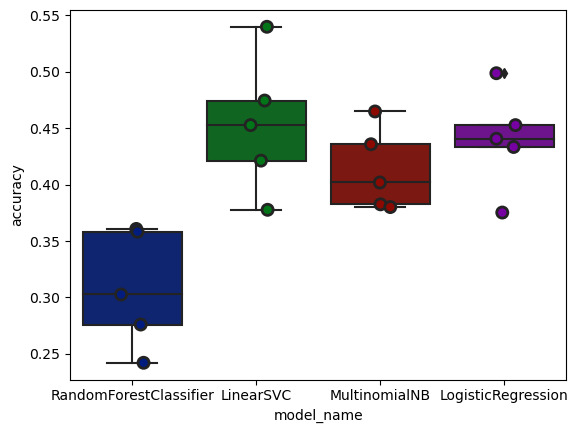

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [61]:
# Accuracy score
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.453269
LogisticRegression        0.440194
MultinomialNB             0.413075
RandomForestClassifier    0.307990
Name: accuracy, dtype: float64

### <font color = Green > Insights: </font>

LinearSVC and Logistic Regression perform better than the other two classifiers, with LinearSVC having a slight advantage with a median accuracy of around 45%.

# Model Evaluation
Continue with our best model (LinearSVC), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

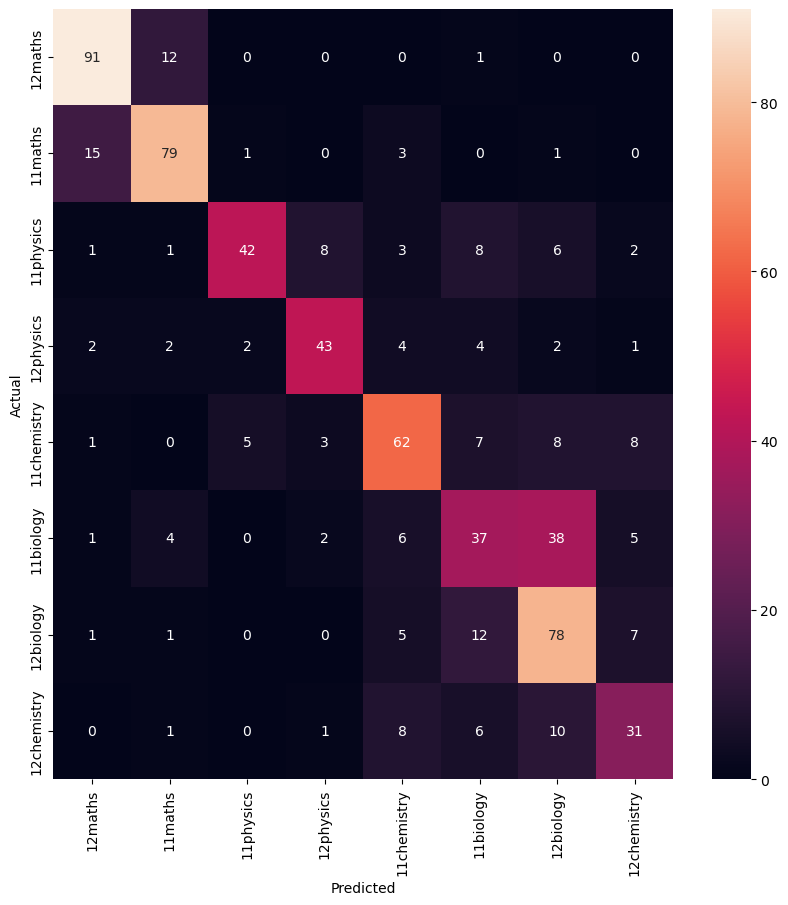

In [62]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, subjects.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.actual_subject.values, yticklabels=category_id_df.actual_subject.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### <font color = Green > Insights: </font>

The vast majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be. However, there are a number of misclassifications, and it might be interesting to see what those are caused by:

In [63]:
from IPython.display import display
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], 
                                                                 conf_mat[actual, predicted]))
            display(subjects.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['actual_subject', 
                                                                                      'question_text']])
            print('')

'11maths' predicted as '12maths' : 15 examples.


,actual_subject,question_text
801,11maths,"<p>If&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""normal"">A</mi..."
619,11maths,"<p>If&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mi>f</mi>&nbsp;<mo stretchy=""false""..."
465,11maths,"<p>If&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mi>e</mi>&nbsp;</math>&nbsp;is the ..."
310,11maths,"<p>If&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""normal"">A</mi..."
314,11maths,"<p>&nbsp;If&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mi>f</mi>&nbsp;<mo stretchy=""..."
795,11maths,<p>A single letter is selected at random from the word 'PROBABILITY'. The probability that it is...
799,11maths,"<p>The probability that at least one of the events A and B occurs is&nbsp;<math xmlns=""http://ww..."
326,11maths,"<p>The domain for which the functions defined by&nbsp;<math xmlns=""http://www.w3.org/1998/Math/M..."
299,11maths,"<p>If sets&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi mathvariant=""normal"">..."
408,11maths,"<p>Let&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mi>S</mi>&nbsp;</math>&nbsp;be the..."



'12maths' predicted as '11maths' : 12 examples.


,actual_subject,question_text
233,12maths,"<p>The coordinates of the foot of the perpendicular drawn from the point&nbsp;<math xmlns=""http:..."
220,12maths,"<p>The vector having initial and terminal points as&nbsp;<math xmlns=""http://www.w3.org/1998/Mat..."
240,12maths,"<p>The sine of the angle between the straight line&nbsp;<math xmlns=""http://www.w3.org/1998/Math..."
276,12maths,"<p>Assume that in a family, each child is equally likely to be a boy or a girl. A family with th..."
118,12maths,"<p>At&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mi>x</mi>&nbsp;<mo>=</mo>&nbsp;<mfr..."
175,12maths,"<p>The number of solutions of&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mfrac><mrow..."
289,12maths,"<p>In a college,&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mn>30</mn>&nbsp;<mi math..."
206,12maths,"<p>The vector with initial point&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow><mi..."
113,12maths,"<p>The maximum value of&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mi>sin</mi>&nbsp;..."
48,12maths,"<p>The domain of the function defined by&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><..."



'12biology' predicted as '11biology' : 12 examples.


,actual_subject,question_text
1555,12biology,<p>Which of the following is a post-fertllisation event in flowering plants?</p>
1807,12biology,<p>Among the following bio-geo-chemical cycles which one does not have losses due to respiration...
1597,12biology,<p>Which one of the following is not a male accessory gland?</p>
1546,12biology,<p>Identfy the incorrect statement.</p>
1797,12biology,<p>Which of the following forest plants controls the light conditions at the ground?</p>
1651,12biology,"<p>In E.coli, the lac operon gets switched on when:</p>"
1838,12biology,<p>Non-blodegradable pollutants are created by:</p>
1859,12biology,<p>Catalytic converters are fltted into automobtles to reduce emission of harmful gases. Catalyt...
1669,12biology,<p>Analogous organs arise due to:</p>
1601,12biology,<p>The method of directly injecting a sperm into ovum in Assisted Reproductive Technology is cal...



'11biology' predicted as '12biology' : 38 examples.


,actual_subject,question_text
1433,11biology,<p>The enzyme that is not found in a C3 plant is</p>
1379,11biology,<p>Which of the following stains is not used for staining chromosomes?</p>
1442,11biology,<p>Mitochondrla are called powerhouses of the cell. Which of the following observations support ...
1439,11biology,<p>Q</p>
1360,11biology,<p>Q</p>
1315,11biology,<p>The embryo sac of an Angiosperm is made up of</p>
1863,11biology,<p>Hepato-pancreatic duct opens into the duodenum and carrles</p>
1515,11biology,<p>Knee joint and elbow joint are examples of</p>
1372,11biology,<p>Which of the following is not true of a eukaryotic cell?</p>
1323,11biology,<p>Which one of the following is a non-poisonous snake?</p>



'12chemistry' predicted as '12biology' : 10 examples.


,actual_subject,question_text
2054,12chemistry,<p>In the metallurgy of aluminium</p>
1892,12chemistry,<p>The percentage of empty space in a body centred cubic arrangement is</p>
1913,12chemistry,"<p>An excess of potassium ions makes&nbsp;<math xmlns=""http://www.w3.org/1998/Math/MathML""><mrow..."
2012,12chemistry,<p>During decomposition of an activated complex</p>
2060,12chemistry,<p>Zone refining is based on the principle that</p>
2013,12chemistry,<p>Which of the following statements are in accordance with the Arrhenius equation?</p>
1965,12chemistry,<p>An electrochemical cell can behave like an electrolytlc cell when</p>
1916,12chemistry,<p>Which of the following defects decrease the density?</p>
2004,12chemistry,<p>Rate law cannot be determined from balanced chemical equation if -</p>
1901,12chemistry,<p>Which of the following defects is also known as dislocation defect?</p>


### <font color = Green > Insights: </font>

As you can see, some of the misclassified subjects are subjects that touch on more than one subjects (for example, subjects involving both 11maths and 12maths). This sort of errors will always happen.


Again, we use the chi-squared test to find the terms that are the most correlated with each of the categories:

In [64]:
model.fit(features, labels)

N = 2
for actual_subject, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(actual_subject))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '11biology':
  . Most correlated unigrams:
. belong
. hormone
  . Most correlated bigrams:
. statements incorrect
. living organisms
# '11chemistry':
  . Most correlated unigrams:
. compounds
. iupac
  . Most correlated bigrams:
. correct iupac
. following compounds
# '11maths':
  . Most correlated unigrams:
. nbsp
. mo
  . Most correlated bigrams:
. mo nbsp
. nbsp mo
# '11physics':
  . Most correlated unigrams:
. speed
. motion
  . Most correlated bigrams:
. speed nbsp
. mass nbsp
# '12biology':
  . Most correlated unigrams:
. genes
. dna
  . Most correlated bigrams:
. mo nbsp
. mi nbsp
# '12chemistry':
  . Most correlated unigrams:
. adsorption
. solid
  . Most correlated bigrams:
. nbsp following
. order reaction
# '12maths':
  . Most correlated unigrams:
. texclass
. mo
  . Most correlated bigrams:
. mo nbsp
. msup mi
# '12physics':
  . Most correlated unigrams:
. current
. fleld
  . Most correlated bigrams:
. magnetic fleld
. electric fleld


### <font color = Green > Insights: </font>

They are consistent within our expectation.

Finally, we print out the classification report for each class:

In [65]:
from sklearn import metrics
print(subjects['actual_subject'].unique())
print('accuracy %s' % metrics.accuracy_score(y_pred, y_test))
print(metrics.classification_report(y_test, y_pred, target_names=subjects['actual_subject'].unique()))

['12maths' '11maths' '11physics' '12physics' '11chemistry' '11biology'
 '12biology' '12chemistry']
accuracy 0.6788856304985337
              precision    recall  f1-score   support

     12maths       0.81      0.88      0.84       104
     11maths       0.79      0.80      0.79        99
   11physics       0.84      0.59      0.69        71
   12physics       0.75      0.72      0.74        60
 11chemistry       0.68      0.66      0.67        94
   11biology       0.49      0.40      0.44        93
   12biology       0.55      0.75      0.63       104
 12chemistry       0.57      0.54      0.56        57

    accuracy                           0.68       682
   macro avg       0.69      0.67      0.67       682
weighted avg       0.68      0.68      0.68       682



### <font color = Green > Conclusion: </font>

+ We have achieve an accuracy score of 67% in LinearSVC model here. 